In [1]:
# Torch imports
import torch
from torchvision.transforms import v2

# File reading
import os
import pickle
from glob import glob

# Utils
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

# 1. Global Annotations File 

In [27]:
# Annotations structure
file = './datasets/Room_all_agents/Room1/Setting1/8m/episode_0001/episode_0001.pkl'
with open(file, 'rb') as f:
    df = pickle.load(f)
    display(df.head())

,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,robot_1_rel_pos_x,robot_1_rel_pos_y,robot_1_in_fov,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
1,1,1,2.5,0.0,-2.499364,0.000094,0.117077,2.107222,-0.783901,True,6.918802,0.082890,True,6.357754,0.892982,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
2,1,2,2.5,0.0,-2.497246,0.000766,0.395836,1.800532,-1.312243,True,6.669603,-1.835180,True,6.347177,-0.898825,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
3,1,3,2.5,0.0,-2.485843,0.007717,0.725341,1.269790,-1.777184,False,5.684648,-3.913701,True,5.676816,-2.914395,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
4,1,4,2.5,0.0,-2.475703,0.019575,1.031016,0.675467,-2.030959,False,4.195889,-5.452686,True,4.486544,-4.485341,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
5,1,5,2.5,0.0,-2.466661,0.039314,1.287408,0.139663,-2.092604,False,2.620631,-6.332658,False,3.149596,-5.458576,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0


In [21]:
# Filter warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Create a global annotations file
ep_dfs = []
for room in range(1, len(glob('./datasets/Room_all_agents/Room*'))+1):
    room_dir = f'./datasets/Room_all_agents/Room{room}'

    for setting in range(1, len(glob(f'{room_dir}/*'))+1):
        set_dir = f'{room_dir}/Setting{setting}'

        for agent_dir in glob(f'{set_dir}/*'):
            agent = agent_dir.split('/')[-1]

            for ep in range(1, len(glob(f'{agent_dir}/episode_*'))+1):     

                ep_dir = f'{agent_dir}/episode_{ep:04}'
                try:
                    with open(f'{ep_dir}/episode_{ep:04}.pkl', 'rb') as f:
                        df = pickle.load(f)

                        if ep not in df['episode'].unique():
                            print(f'[WARN] Fixed episode in DataFrame {ep_dir}/{ep:04}.pkl not matching the name of the directory.')
                            df['episode'] =  np.ones(df.shape[0], dtype=int) * ep

                        df.insert(0, 'agent', [agent for _ in range(df.shape[0])])
                        df.insert(0, 'setting', np.ones(df.shape[0], dtype=int) * setting)
                        df.insert(0, 'room', np.ones(df.shape[0], dtype=int) * room)
                        ep_dfs.append(df)
                except FileNotFoundError:
                    print(f'[WARN] File not found: {ep_dir}/{ep}.pkl')

ep_dfs = pd.concat(ep_dfs)
ep_dfs.index = list(range(0, ep_dfs.shape[0]))

display(ep_dfs.head())

[WARN] Fixed episode in DataFrame ./datasets/Room_all_agents/Room1/Setting3/8m/episode_0005/0005.pkl not matching the name of the directory.
[WARN] Fixed episode in DataFrame ./datasets/Room_all_agents/Room1/Setting4/8m/episode_0005/0005.pkl not matching the name of the directory.
[WARN] Fixed episode in DataFrame ./datasets/Room_all_agents/Room1/Setting5/8m/episode_0005/0005.pkl not matching the name of the directory.


,room,setting,agent,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,...,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
0,1,1,6000000,1,1,2.5,0.0,-2.511899,-0.000324,0.064005,...,0.971636,-5.042394,False,0.939695,-2.672393,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
1,1,1,6000000,1,2,2.5,0.0,-2.538352,-0.003958,0.220937,...,0.202131,-5.149991,False,0.542664,-2.781755,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
2,1,1,6000000,1,3,2.5,0.0,-2.564896,-0.012329,0.437258,...,-0.881970,-5.099983,False,-0.024519,-2.821527,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
3,1,1,6000000,1,4,2.5,0.0,-2.581863,-0.022204,0.718748,...,-2.253910,-4.679027,False,-0.768752,-2.690010,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
4,1,1,6000000,1,5,2.5,0.0,-2.578010,-0.015496,1.005735,...,-3.509466,-3.866783,False,-1.486116,-2.346344,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0


In [22]:
# Save the annotations file (will be used in the torch Dataset object)
if not os.path.exists('./datasets/Room_all_agents/annotations.pkl'):
    ep_dfs.to_pickle('./datasets/Room_all_agents/annotations.pkl')

# 2. Image Analysis

In [184]:
file = './datasets/Room_all_agents/annotations.pkl'
with open(file, 'rb') as f:
    ep_dfs = pickle.load(f)
    ep_dfs = ep_dfs[ep_dfs['room'] == 2]
    ep_dfs.reset_index(inplace=True, drop=True)
    display(ep_dfs.head())

print(f"Number of records: {ep_dfs.shape[0]}")

,room,setting,agent,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,...,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
0,2,1,6000000,1,1,2.5,0.0,-2.487847,0.000218,0.054146,...,0.399477,-2.058357,False,-1.727415,1.410629,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
1,2,1,6000000,1,2,2.5,0.0,-2.460172,0.003844,0.212251,...,0.041570,-2.091258,False,-1.512678,1.673131,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
2,2,1,6000000,1,3,2.5,0.0,-2.432260,0.012499,0.408508,...,-0.399858,-2.046972,False,-1.183808,1.955544,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
3,2,1,6000000,1,4,2.5,0.0,-2.402785,0.028176,0.571788,...,-0.764642,-1.943012,False,-0.870931,2.145500,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
4,2,1,6000000,1,5,2.5,0.0,-2.369146,0.052264,0.635774,...,-0.934406,-1.880718,False,-0.755153,2.213702,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0


Number of records: 8753


In [185]:
# Random sample as anchor
rand_idx = np.random.randint(1, ep_dfs.shape[0] + 1)

anchor_rec = ep_dfs.iloc[rand_idx]
room = anchor_rec['room']
setting = anchor_rec['setting']
agent = anchor_rec['agent']
ep = anchor_rec['episode']
step = anchor_rec['step']

f"{room}", f"{setting}", f"{ep:04}", f"{step:05}"

('2', '1', '0003', '00081')

In [186]:
anchor_rec

room                                                                 2
setting                                                              1
agent                                                           400000
episode                                                              3
step                                                                81
target_point_x                                                     2.5
target_point_y                                                     0.0
robot_pos_x                                                  -2.334517
robot_pos_y                                                   0.481397
robot_yaw                                                    -0.990137
robot_1_rel_pos_x                                              1.26618
robot_1_rel_pos_y                                             5.365334
robot_1_in_fov                                                   False
robot_2_rel_pos_x                                             1.181203
robot_

In [187]:
# Look for positive examples in either other rooms or settings or other agents
pos_df = ep_dfs[(ep_dfs['setting'] != anchor_rec['setting']) | (ep_dfs['episode'] != anchor_rec['episode']) | (ep_dfs['agent'] != anchor_rec['agent'])].copy()
pos_df

,room,setting,agent,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,...,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
0,2,1,6000000,1,1,2.5,0.0,-2.487847,0.000218,0.054146,...,0.399477,-2.058357,False,-1.727415,1.410629,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
1,2,1,6000000,1,2,2.5,0.0,-2.460172,0.003844,0.212251,...,0.041570,-2.091258,False,-1.512678,1.673131,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
2,2,1,6000000,1,3,2.5,0.0,-2.432260,0.012499,0.408508,...,-0.399858,-2.046972,False,-1.183808,1.955544,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
3,2,1,6000000,1,4,2.5,0.0,-2.402785,0.028176,0.571788,...,-0.764642,-1.943012,False,-0.870931,2.145500,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
4,2,1,6000000,1,5,2.5,0.0,-2.369146,0.052264,0.635774,...,-0.934406,-1.880718,False,-0.755153,2.213702,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,2,3,8m,5,86,2.5,0.0,1.940749,0.103740,-0.132197,...,-6.194475,-2.927711,False,-5.179220,-4.400761,False,"{'scan': [[0.13120943], [0.1346703], [0.138357...",9.0,10.0,11.0
8749,2,3,8m,5,87,2.5,0.0,1.991763,0.096320,-0.157763,...,-6.163866,-3.083260,False,-5.137458,-4.532350,False,"{'scan': [[0.14208236], [0.14566554], [0.14947...",9.0,10.0,11.0
8750,2,3,8m,5,88,2.5,0.0,2.042558,0.087611,-0.183483,...,-6.128777,-3.235537,False,-5.091092,-4.658668,False,"{'scan': [[0.15766236], [0.16162385], [0.16583...",9.0,10.0,11.0
8751,2,3,8m,5,89,2.5,0.0,2.093258,0.077597,-0.207789,...,-6.097354,-3.377372,False,-5.046530,-4.772039,False,"{'scan': [[0.16784842], [0.17175904], [0.17591...",9.0,10.0,11.0


In [188]:
# Look for negative examples in other episodes of the same setting of the room
neg_df = ep_dfs[(ep_dfs['room'] == anchor_rec['room']) & (ep_dfs['setting'] == anchor_rec['setting']) & ((ep_dfs['episode'] != anchor_rec['episode']) | (ep_dfs['agent'] != anchor_rec['agent']))].copy()
neg_df

,room,setting,agent,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,...,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
0,2,1,6000000,1,1,2.5,0.0,-2.487847,0.000218,0.054146,...,0.399477,-2.058357,False,-1.727415,1.410629,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
1,2,1,6000000,1,2,2.5,0.0,-2.460172,0.003844,0.212251,...,0.041570,-2.091258,False,-1.512678,1.673131,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
2,2,1,6000000,1,3,2.5,0.0,-2.432260,0.012499,0.408508,...,-0.399858,-2.046972,False,-1.183808,1.955544,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
3,2,1,6000000,1,4,2.5,0.0,-2.402785,0.028176,0.571788,...,-0.764642,-1.943012,False,-0.870931,2.145500,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
4,2,1,6000000,1,5,2.5,0.0,-2.369146,0.052264,0.635774,...,-0.934406,-1.880718,False,-0.755153,2.213702,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,2,1,8m,5,107,2.5,0.0,2.489289,0.509339,-0.841457,...,1.426331,-2.988609,False,3.798527,-0.381165,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
3178,2,1,8m,5,108,2.5,0.0,2.521469,0.471775,-0.885632,...,1.515599,-2.933292,False,3.767872,-0.226590,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
3179,2,1,8m,5,109,2.5,0.0,2.552459,0.432503,-0.923080,...,1.578644,-2.887142,False,3.733020,-0.095891,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
3180,2,1,8m,5,110,2.5,0.0,2.581659,0.392362,-0.963327,...,1.644339,-2.832132,False,3.696884,0.047760,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0


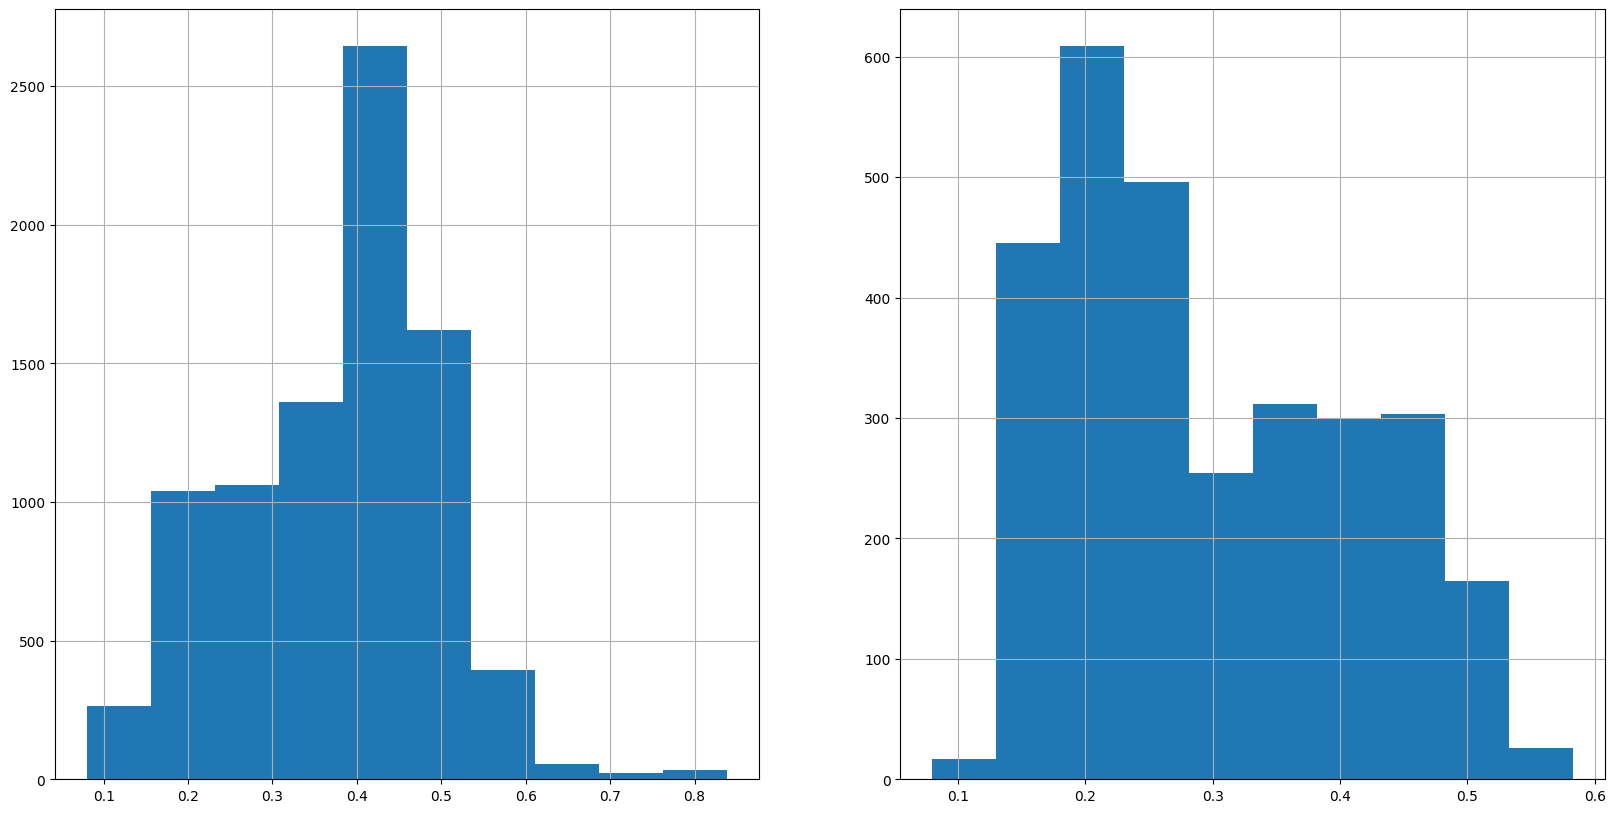

In [189]:
# Weight vector
anc_scan = anchor_rec.laser_readings['scan'].squeeze()
w = np.zeros(anc_scan.shape[0])
# In FOV readings (consider only them for binary masking)
w[64:164] += 1 
# Out of FOV readings (consider also them for soft masking)
x = np.linspace(0.0, 1.0, w[164:].shape[0])
sigmoid = 1 - 0.9*(1 / (1+np.exp(-x))) # Sigmoid 1.0 -> 0.1
w[164:] += sigmoid
w[63::-1] += sigmoid

# Normalizer
den = np.sqrt(w.sum())

# Normalized weighted Eucledian distances on LiDAR readings 
pos_l2_dist = pos_df['laser_readings'].map(lambda x: np.sqrt(np.sum(w*(anc_scan - x['scan'].squeeze())**2)) / den)
neg_l2_dist = neg_df['laser_readings'].map(lambda x: np.sqrt(np.sum(w*(anc_scan - x['scan'].squeeze())**2)) / den)

fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(1,2,1)
pos_l2_dist.hist(ax=ax);
bx = fig.add_subplot(1,2,2)
neg_l2_dist.hist(ax=bx);

-5 -5


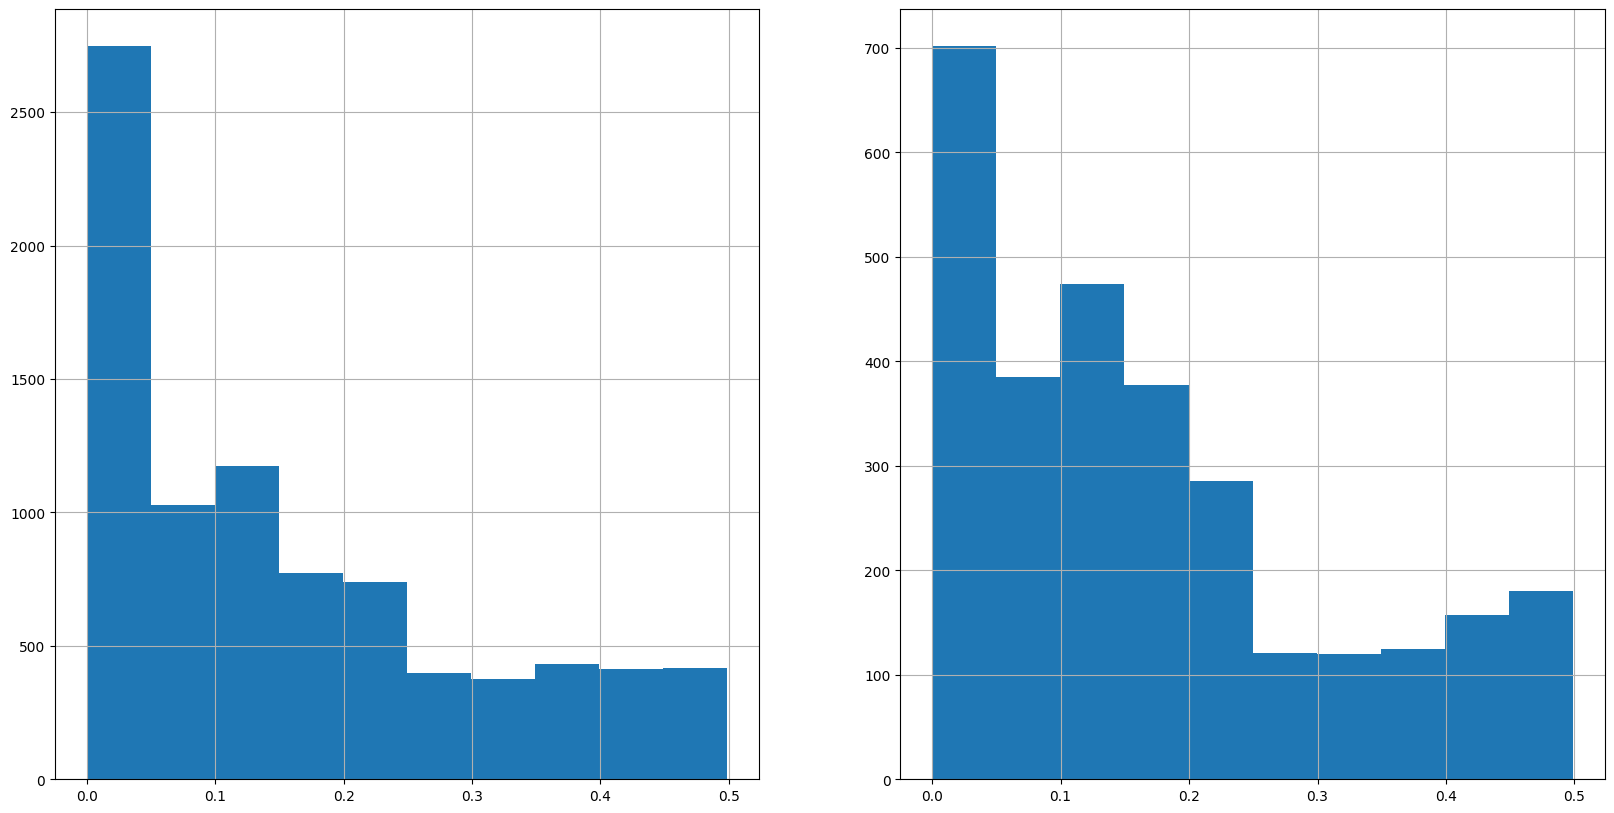

In [190]:
def opposite_corner(x, y):
    opposite_x = -5 if x >= 0 else 5
    opposite_y = -5 if y >= 0 else 5
    return opposite_x, opposite_y

# Normalized goal distance difference 
goal_pos_x, goal_pos_y = anchor_rec['target_point_x'], anchor_rec['target_point_y']
corner_x, corner_y = opposite_corner(goal_pos_x, goal_pos_y)
print(corner_x, corner_y)
max_gd = np.sqrt((goal_pos_x - corner_x)**2 + (goal_pos_y - corner_y)**2)

anchor_gd = np.sqrt((anchor_rec['robot_pos_x'] - goal_pos_x)**2 + (anchor_rec['robot_pos_y'] - goal_pos_y)**2)
pos_gd_diffs = pos_df.apply(lambda x: abs(anchor_gd - np.sqrt((x['robot_pos_x'] - goal_pos_x)**2 + (x['robot_pos_y'] - goal_pos_y)**2)), axis=1) / max_gd 
neg_gd_diffs = neg_df.apply(lambda x: abs(anchor_gd - np.sqrt((x['robot_pos_x'] - goal_pos_x)**2 + (x['robot_pos_y'] - goal_pos_y)**2)), axis=1) / max_gd

fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(1,2,1)
pos_gd_diffs.hist(ax=ax);
bx = fig.add_subplot(1,2,2)
neg_gd_diffs.hist(ax=bx);

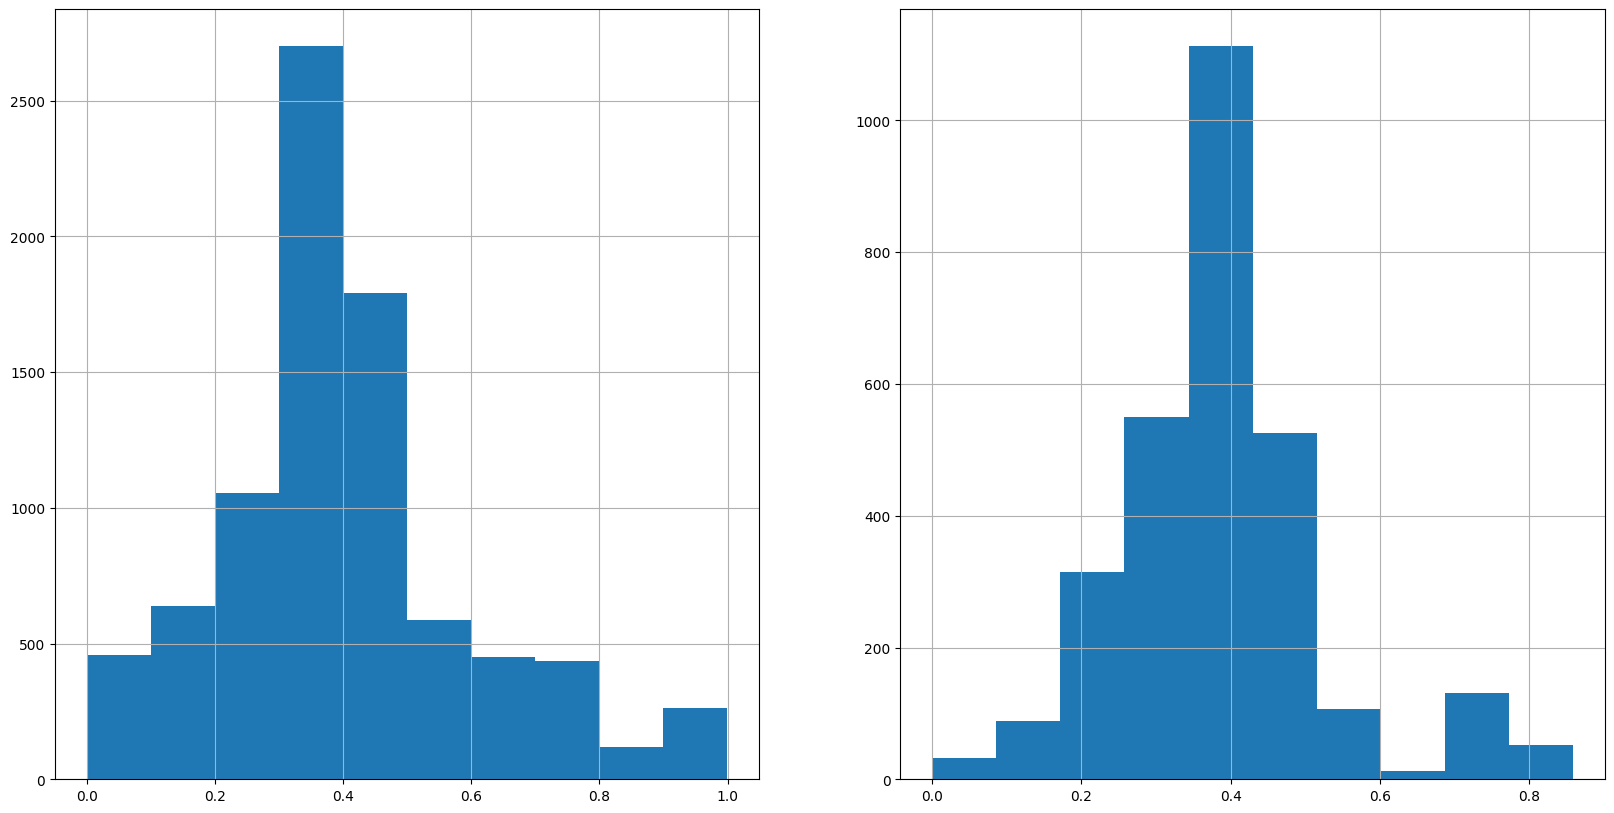

In [191]:
# Normalize angle between [-pi, pi]
def normalize_angle(angle):
    return (angle + np.pi) % (2 * np.pi) - np.pi

# Compute angle with respect to the goal considering robot's orientation
def relative_angle(record):
    # Info
    robot_x, robot_y = record['robot_pos_x'], record['robot_pos_y']
    goal_x, goal_y = record['target_point_x'], record['target_point_y']
    theta_r = record['robot_yaw'] 

    # Relative angle
    dx = goal_x - robot_x
    dy = goal_y - robot_y
    theta_g = np.arctan2(dy, dx)
    return normalize_angle(theta_g - theta_r)

# Orientation towards goal position
anchor_phi = relative_angle(anchor_rec)
pos_ori_diff = pos_df.apply(lambda x: np.abs(normalize_angle(anchor_phi - relative_angle(x))) / np.pi, axis=1) 
neg_ori_diff = neg_df.apply(lambda x: np.abs(normalize_angle(anchor_phi - relative_angle(x))) / np.pi, axis=1)

fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(1,2,1)
pos_ori_diff.hist(ax=ax);
bx = fig.add_subplot(1,2,2)
neg_ori_diff.hist(ax=bx);

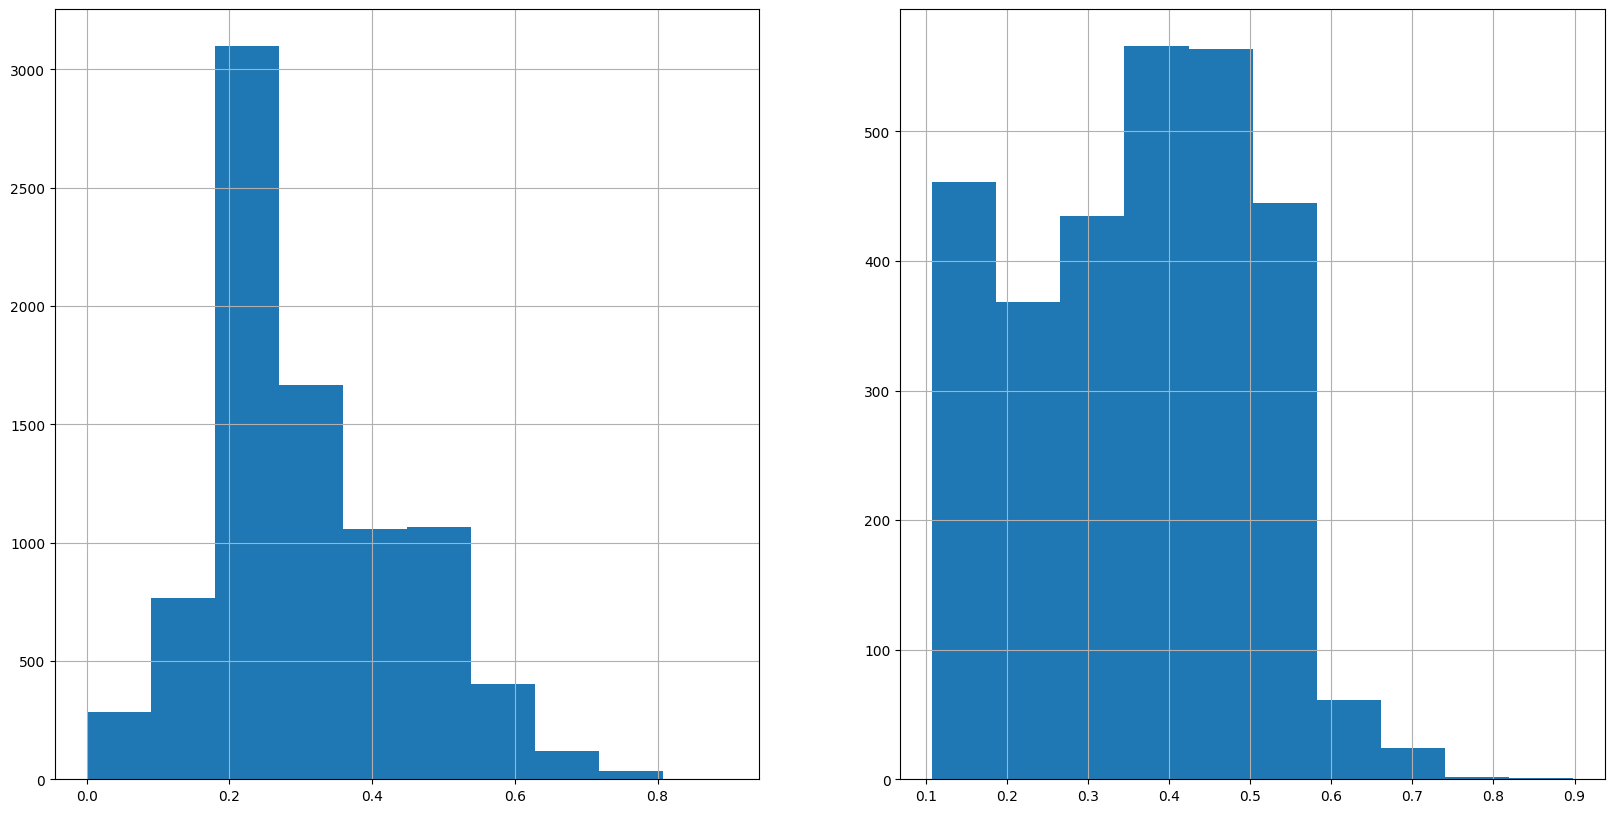

In [205]:
# Combine distances for computing similarities
pos_sim_scores = (1 - pos_l2_dist)*(1 - pos_gd_diffs)*(1 - pos_ori_diff)
neg_sim_scores = (1 - neg_l2_dist)*(1 - neg_gd_diffs)*(1 - neg_ori_diff)

fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(1,2,1)
pos_sim_scores.hist(ax=ax);
bx = fig.add_subplot(1,2,2)
neg_sim_scores.hist(ax=bx);

In [193]:
# Negative examples mining
BASE_NEG_DIST = 0.2
N_NEG_SAMPLES = 24

negative = neg_sim_scores[neg_sim_scores < BASE_NEG_DIST]
while negative.shape[0] < N_NEG_SAMPLES*2:
    BASE_NEG_DIST += 0.01
    negative = neg_sim_scores[neg_sim_scores < BASE_NEG_DIST]

print(f'Found {N_NEG_SAMPLES*2} negative examples with threshold {BASE_NEG_DIST}')

neg_ex = negative.sample(n=N_NEG_SAMPLES)
neg_ex

Found 48 negative examples with threshold 0.2


1544    0.192247
1446    0.199021
695     0.176397
1581    0.173309
3176    0.135017
1577    0.165991
2770    0.173137
1463    0.162830
718     0.172976
1538    0.185773
730     0.184705
3064    0.161830
1552    0.179038
1499    0.164084
701     0.172317
679     0.184576
2753    0.198940
2759    0.193835
2766    0.177854
286     0.175867
1643    0.140952
648     0.181411
3177    0.130831
1473    0.125851
dtype: float64

In [194]:
negative_rec = ep_dfs.iloc[neg_ex.index]
negative_rec

,room,setting,agent,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,...,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
1544,2,1,400000,1,81,2.5,0.0,-1.596300,2.875450,0.801202,...,-1.859684,-7.308720,False,1.371920,1.830031,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
1446,2,1,3200000,5,80,2.5,0.0,1.425699,0.511918,-0.117784,...,-1.987918,-5.671153,False,2.516848,-3.084629,True,"{'scan': [[0.756288], [0.74587303], [0.7488235...",9.0,10.0,11.0
695,2,1,3200000,1,206,2.5,0.0,2.043127,0.451842,-0.715126,...,-0.670591,1.105942,False,-6.794954,0.388214,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
1581,2,1,400000,1,118,2.5,0.0,-0.764669,3.602198,0.553754,...,-1.420539,-8.178284,False,-0.034633,1.752479,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
3176,2,1,8m,5,106,2.5,0.0,2.456700,0.543680,-0.785388,...,1.295891,-3.059589,False,3.818465,-0.580142,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
1577,2,1,400000,1,114,2.5,0.0,-0.855216,3.540745,0.634550,...,-1.844875,-8.085727,False,0.110685,1.759948,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
2770,2,1,8m,1,90,2.5,0.0,1.986378,0.385495,-0.406148,...,1.914887,0.542071,True,-3.045937,-0.136722,False,"{'scan': [[0.084921695], [0.082688525], [0.080...",9.0,10.0,11.0
1463,2,1,3200000,5,97,2.5,0.0,2.243983,0.256907,-0.531657,...,-0.471609,-6.273569,False,2.581528,-2.206611,True,"{'scan': [[0.070863925], [0.071714915], [0.072...",9.0,10.0,11.0
718,2,1,3200000,1,229,2.5,0.0,1.809283,0.559207,-0.164260,...,0.282517,1.161760,False,-5.530268,4.096926,False,"{'scan': [[0.11680682], [0.114941314], [0.1131...",9.0,10.0,11.0
1538,2,1,400000,1,75,2.5,0.0,-1.737284,2.712179,0.887331,...,-2.312984,-7.199028,False,1.755518,1.728747,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0


In [195]:
# Retrieve negative records
neg_imgs = []
for _, neg_rec in negative_rec.iterrows():
    neg_room = neg_rec['room']
    neg_set = neg_rec['setting']
    neg_agent = neg_rec['agent']
    neg_ep = neg_rec['episode']
    neg_step = neg_rec['step']
    neg_imgs.append((f'./datasets/Room_all_agents/Room{neg_room}/Setting{neg_set}/{neg_agent}/episode_{neg_ep:04}/rgb_{neg_step:05}.png', neg_room, neg_set, neg_ep, neg_step))

In [196]:
# Positive examples mining
BASE_POS_DIST = 0.8
N_POS_SAMPLES = 12

positive = pos_sim_scores[pos_sim_scores > BASE_POS_DIST]
while positive.shape[0] < N_POS_SAMPLES*2:
    BASE_POS_DIST -= 0.01
    positive = pos_sim_scores[pos_sim_scores > BASE_POS_DIST]

print(f'Found {N_POS_SAMPLES*2} positive examples with threshold {BASE_POS_DIST}')

pos_ex = positive.sample(n=N_POS_SAMPLES)
pos_ex

Found 24 positive examples with threshold 0.73


7797    0.750189
7498    0.751258
7825    0.731946
2173    0.778427
7802    0.754884
7836    0.731299
7798    0.738941
8109    0.746391
7806    0.760548
7826    0.737900
7821    0.737723
7502    0.737870
dtype: float64

In [197]:
positive_rec = ep_dfs.iloc[pos_ex.index]
positive_rec

,room,setting,agent,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,...,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
7797,2,3,400000,4,6,2.5,0.0,-2.330537,-0.068597,-0.854562,...,-4.736201,2.040251,False,-4.327653,2.401243,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
7498,2,3,400000,2,11,2.5,0.0,-2.191359,-0.216888,-0.835738,...,0.964258,-0.892279,True,4.374392,-1.226199,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
7825,2,3,400000,4,34,2.5,0.0,-2.201466,-0.229814,-0.778685,...,-4.842002,2.514364,False,-4.483150,2.793616,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
2173,2,1,400000,4,3,2.5,0.0,-2.475876,-0.012398,-0.642953,...,2.207285,7.938950,False,5.289479,3.743169,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
7802,2,3,400000,4,11,2.5,0.0,-2.318507,-0.092387,-0.846769,...,-4.797036,2.140949,False,-4.383368,2.376673,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
7836,2,3,400000,4,45,2.5,0.0,-2.108826,-0.340636,-0.938740,...,-5.215132,1.657192,False,-4.939599,2.124328,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
7798,2,3,400000,4,7,2.5,0.0,-2.309571,-0.097101,-1.033821,...,-5.074512,1.167637,False,-4.719004,1.568595,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
8109,2,3,400000,5,63,2.5,0.0,-2.032596,-0.705743,-0.778320,...,5.454603,0.849091,True,3.525055,-1.103199,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
7806,2,3,400000,4,15,2.5,0.0,-2.281568,-0.123546,-0.867353,...,-4.861472,2.002271,False,-4.514642,2.305705,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0
7826,2,3,400000,4,35,2.5,0.0,-2.175658,-0.258944,-0.908572,...,-5.162818,1.868478,False,-4.838931,2.179634,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",9.0,10.0,11.0


In [198]:
# Retrieve positive records
pos_imgs = []
for _, pos_rec in positive_rec.iterrows():
    pos_room = pos_rec['room']
    pos_set = pos_rec['setting']
    pos_agent = pos_rec['agent']
    pos_ep = pos_rec['episode']
    pos_step = pos_rec['step']
    pos_imgs.append((f'./datasets/Room_all_agents/Room{pos_room}/Setting{pos_set}/{pos_agent}/episode_{pos_ep:04}/rgb_{pos_step:05}.png', pos_room, pos_set, pos_ep, pos_step))

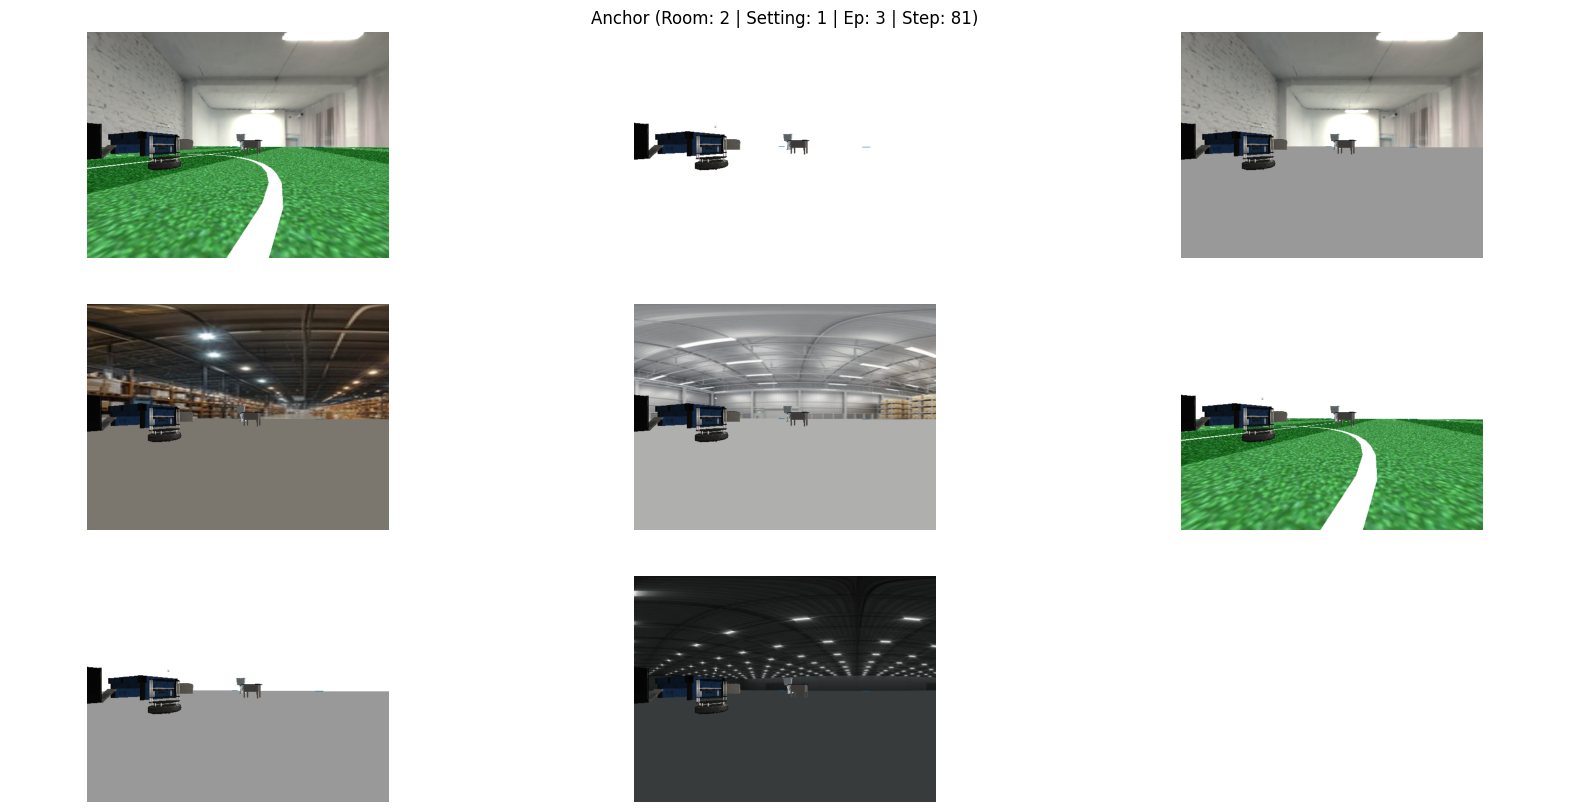

In [199]:
# Anchor image
anc_img = Image.open(f'./datasets/Room_all_agents/Room{room}/Setting{setting}/{agent}/episode_{ep:04}/rgb_{step:05}.png')
# Augmentations
aug_paths = glob(f'./datasets/Room_all_agents/Room{room}/Setting{setting}/{agent}/episode_{ep:04}/augmented_results/*_rgb_{step:05}.png')

# Plot
ROWS = 3
COLS = 3
plt.figure(figsize=[20,10])
plt.title(f'Anchor (Room: {room} | Setting: {setting} | Ep: {ep} | Step: {step})')
plt.axis('off')
plt.subplot(ROWS, COLS, 1)
plt.axis('off')
plt.imshow(anc_img)
for idx, path in enumerate(aug_paths):
    img = Image.open(path)
    plt.subplot(ROWS, COLS, idx+2)
    plt.axis('off')
    plt.imshow(img)

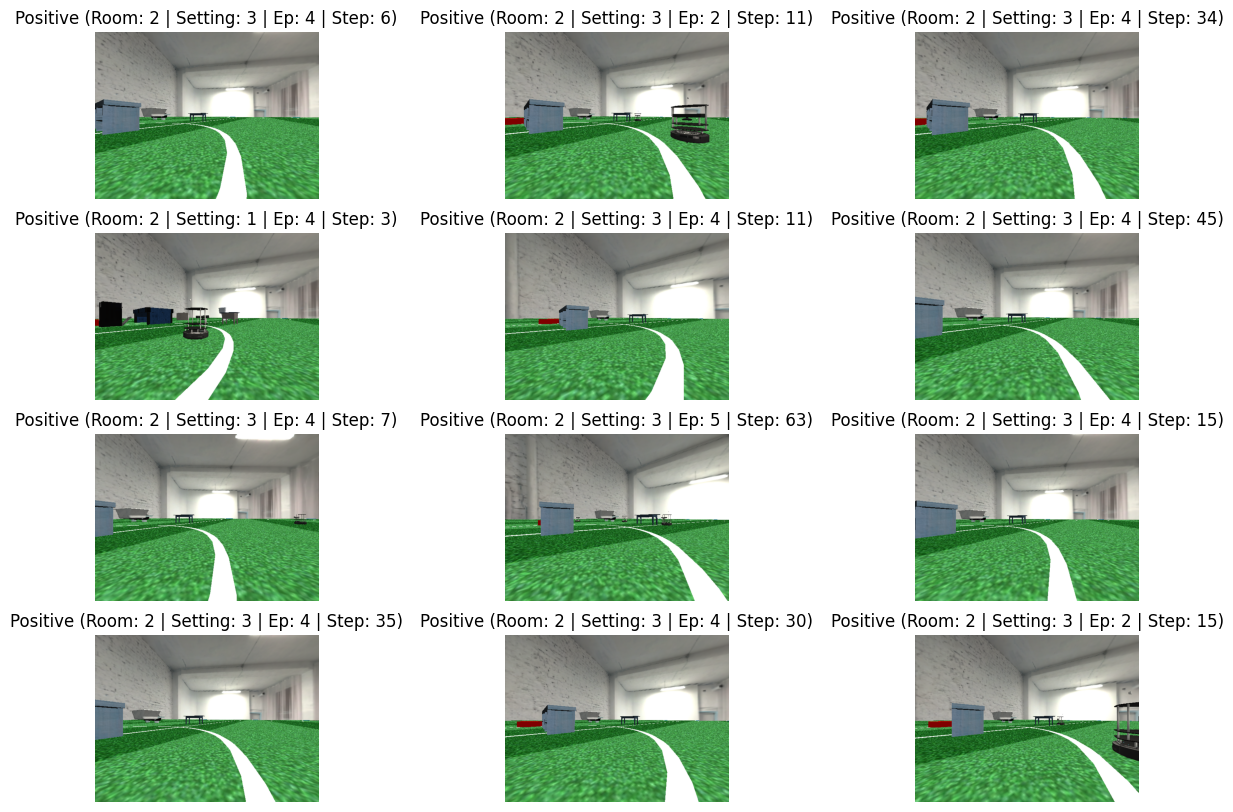

In [200]:
N_ROWS = 4
N_COLS = 3

# Plot positive examples by similarity
plt.figure(figsize=[15,10])
for idx, pos in enumerate(pos_imgs):
    img = Image.open(pos[0])
    plt.subplot(N_ROWS, N_COLS, idx+1)
    plt.title(f'Positive (Room: {pos[1]} | Setting: {pos[2]} | Ep: {pos[3]} | Step: {pos[4]})')
    plt.axis('off')
    plt.imshow(img)
plt.show();

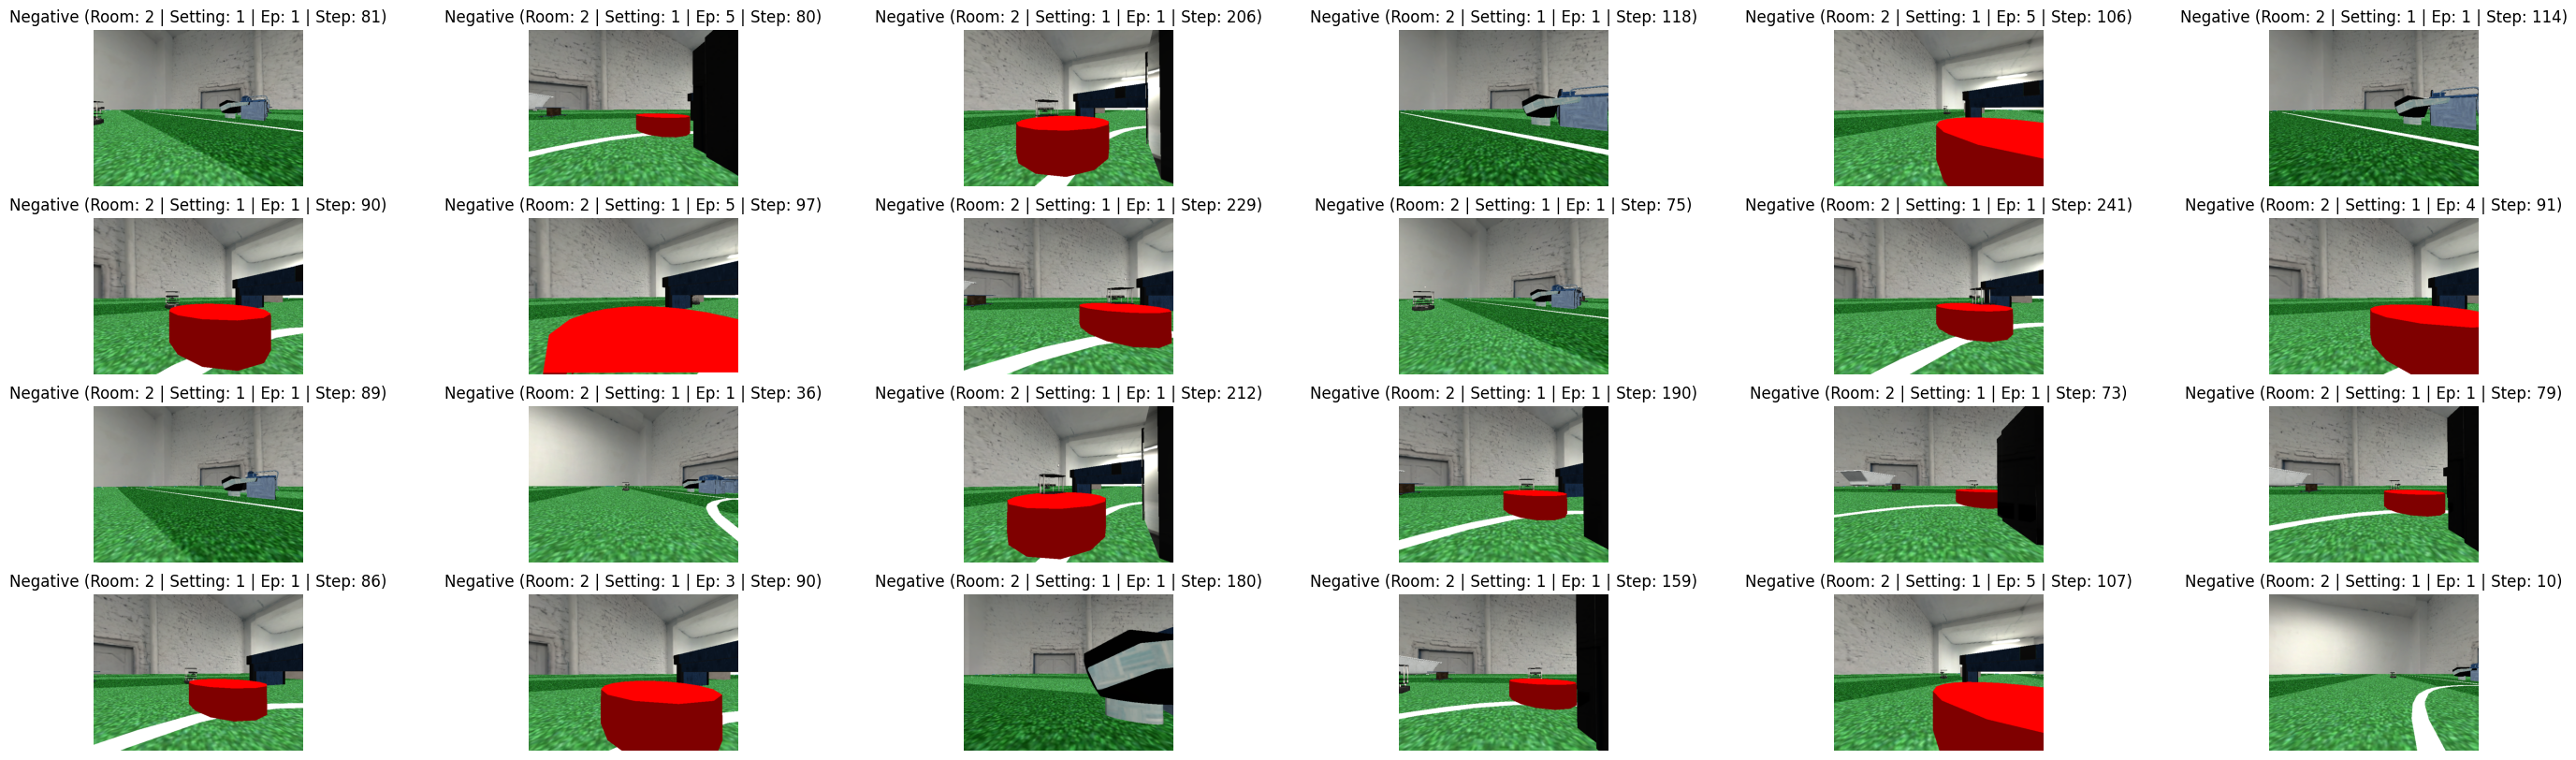

In [201]:
N_ROWS = 4
N_COLS = 6

# Plot negative examples by similarity
plt.figure(figsize=[35,10])
for idx, neg in enumerate(neg_imgs):
    img = Image.open(neg[0])
    plt.subplot(N_ROWS, N_COLS, idx+1)
    plt.title(f'Negative (Room: {neg[1]} | Setting: {neg[2]} | Ep: {neg[3]} | Step: {neg[4]})')
    plt.axis('off')
    plt.imshow(img)
plt.show();